In [72]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [73]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Denver Condo Regression

In [74]:
file_path = Path("../Resources/den_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,91514.0,"Denver, CO",-69.706981,-1.127508
1996-02-29,91872.0,"Denver, CO",0.391197,-69.706981
1996-03-31,92142.0,"Denver, CO",0.293887,0.391197
1996-04-30,92695.0,"Denver, CO",0.600161,0.293887
1996-05-31,93142.0,"Denver, CO",0.482227,0.600161


<AxesSubplot:xlabel='date'>

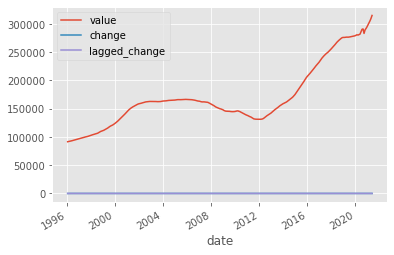

In [75]:
metro_df.plot()

In [76]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [77]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [78]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [79]:
predicted_y_values = model.predict(X)
predicted_y_values

array([ 0.12071052, -2.38806951,  0.17626792,  0.17270813,  0.18391225,
        0.17959798,  0.18061303,  0.1804793 ,  0.18026935,  0.17990734,
        0.1784338 ,  0.18108095,  0.1797615 ,  0.18274843,  0.17851881,
        0.18069752,  0.18157348,  0.18611451,  0.18281771,  0.17877124,
        0.17566115,  0.17783087,  0.18142358,  0.18478216,  0.18507065,
        0.18389284,  0.18032852,  0.17984929,  0.17639746,  0.17927326,
        0.18006035,  0.18864978,  0.19741539,  0.19925074,  0.19624946,
        0.18346168,  0.18588821,  0.18230794,  0.19156127,  0.19171344,
        0.19650014,  0.19665583,  0.20395061,  0.20219226,  0.19618847,
        0.18661906,  0.18992303,  0.19680784,  0.20066705,  0.20230425,
        0.20537756,  0.20512865,  0.21077365,  0.20869152,  0.21113932,
        0.20751735,  0.20983559,  0.21374736,  0.21051332,  0.21123374,
        0.20826225,  0.21363118,  0.20559286,  0.20220539,  0.19586322,
        0.19373132,  0.18715279,  0.18655024,  0.18833272,  0.18

In [80]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.16195712094755496

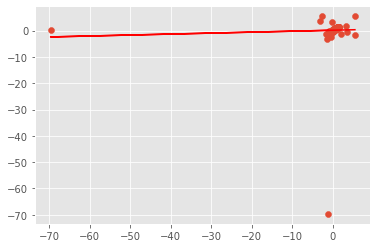

In [81]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [82]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [83]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.001338351015838568
R-squared (R2 ): 0.001338351015838568
Mean Squared Error (MSE): 16.81567432238472
Root Mean Squared Error (RMSE): 4.100691932148124
Standard Deviation: 4.103438772239523


In [84]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [85]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [86]:
# Train the data
#classifier.fit(X_train, y_train)

In [87]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [88]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [89]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [90]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [91]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [107]:
# Predict Percent Change of Housing Prices using a 10 month window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [93]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [94]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#scaler = MinMaxScaler()
#scaler.fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler.fit(y)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [95]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [97]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 10
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [98]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [99]:
# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 3, 10)             480       
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 3, 10)             840       
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [101]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
239/239 [==============================] - 5s 3ms/step - loss: 0.3017
Epoch 2/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1284
Epoch 3/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1039
Epoch 4/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1037
Epoch 5/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1098
Epoch 6/10
239/239 [==============================] - 1s 3ms/step - loss: 0.1018
Epoch 7/10
239/239 [==============================] - 1s 3ms/step - loss: 0.0958
Epoch 8/10
239/239 [==============================] - 1s 3ms/step - loss: 0.0992
Epoch 9/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0968
Epoch 10/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0954


In [102]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 2ms/step - loss: 1.3412


1.3412048816680908

In [103]:
# Make some predictions
predicted = model.predict(X_test)

In [104]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [105]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.tail()

,Real,Predicted
date,,
2021-01-31,13.726640,-4.691191
2021-02-28,44.198803,-2.479351
2021-03-31,-12.903544,-1.176170
2021-04-30,-14.690562,3.637622
2021-05-31,-17.617296,-6.900961


<AxesSubplot:xlabel='date'>

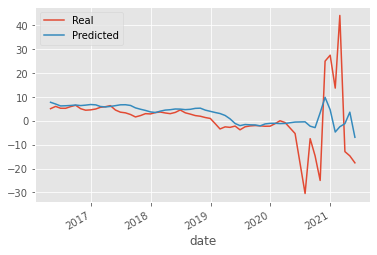

In [106]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [35]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)